In [30]:
from google.colab import drive

# mounting dataset from gdrive
drive.mount('/content/gdrive', force_remount=True)

# dataset path
root_path = 'gdrive/My Drive/Colab Notebooks/Filter/'

print("Path root:", root_path)

Mounted at /content/gdrive
Path root: gdrive/My Drive/Colab Notebooks/Filter/


In [31]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [32]:
def read_image(image_path):
 raw_img = cv2.imread(image_path)
 if raw_img.shape[2] == 3:
   raw_img = cv2.cvtColor(raw_img, cv2.COLOR_BGR2RGB)
 return raw_img
def show_image(rgb_img):
 plt.figure(figsize=(10,20))
 plt.imshow(rgb_img)
 plt.axis('off')

(-0.5, 649.5, 482.5, -0.5)

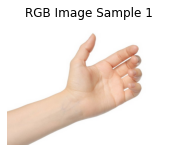

In [33]:
rgb_img1 = read_image(root_path + 'tangan.jpg')

# show image sample
ax1 = plt.figure(figsize=(10,8))
plt.subplot(1,3,1)
plt.imshow(rgb_img1)
plt.title('RGB Image Sample 1')
plt.axis('off')



Average kernel:  [[0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]]


(-0.5, 649.5, 482.5, -0.5)

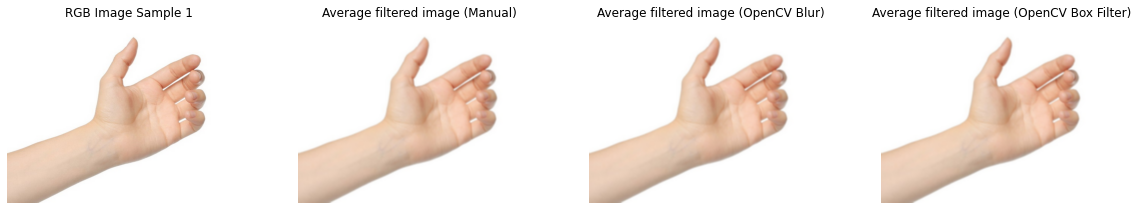

In [34]:
# implement average filter for image smoothing
# example 5x5 average kernel
avg_kernel = np.ones((5,5), np.float32)/25
print('Average kernel: ', avg_kernel)

# filter the image using filter2D
avg_filtered_img1 = cv2.filter2D(rgb_img1, -1, avg_kernel)

# alternative average filter example using OpenCV library
avg_filtered_img2 = cv2.blur(rgb_img1, (5,5))
avg_filtered_img3 = cv2.boxFilter(rgb_img1, -1, (5,5))

# show image 
ax1 = plt.figure(figsize=(20,5))
plt.subplot(1,4,1)
plt.imshow(rgb_img1)
plt.title('RGB Image Sample 1')
plt.axis('off')

plt.subplot(1,4,2)
plt.imshow(avg_filtered_img1)
plt.title('Average filtered image (Manual)')
plt.axis('off')

plt.subplot(1,4,3)
plt.imshow(avg_filtered_img2)
plt.title('Average filtered image (OpenCV Blur)')
plt.axis('off')

plt.subplot(1,4,4)
plt.imshow(avg_filtered_img3)
plt.title('Average filtered image (OpenCV Box Filter)')
plt.axis('off')

(-0.5, 649.5, 482.5, -0.5)

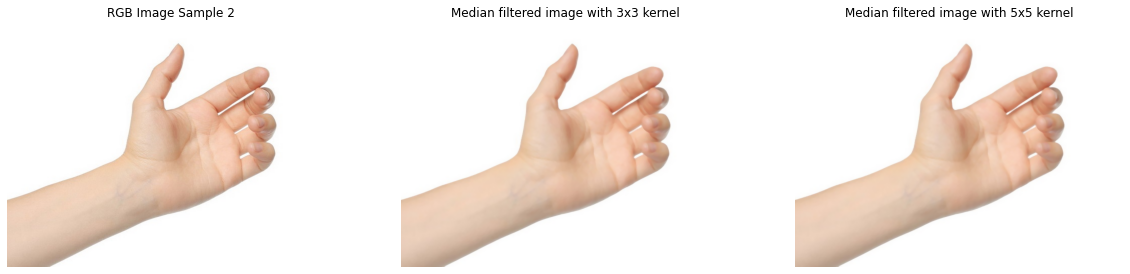

In [41]:
# implement median filter to remove noise
med_filtered_img1 = cv2.medianBlur(rgb_img1, 3)
med_filtered_img1 = cv2.medianBlur(rgb_img1, 5)

# show image
ax1 = plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
plt.imshow(rgb_img1)
plt.title('RGB Image Sample 2')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(med_filtered_img1)
plt.title('Median filtered image with 3x3 kernel')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(med_filtered_img2)
plt.title('Median filtered image with 5x5 kernel')
plt.axis('off')

Gaussian kernel manual:  [[nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]]


<ipython-input-36-e432455a8a63>:7: RuntimeWarning: invalid value encountered in sqrt
  diff=np.sqrt((i-center)*2+(j-center)*2)


(-0.5, 649.5, 482.5, -0.5)

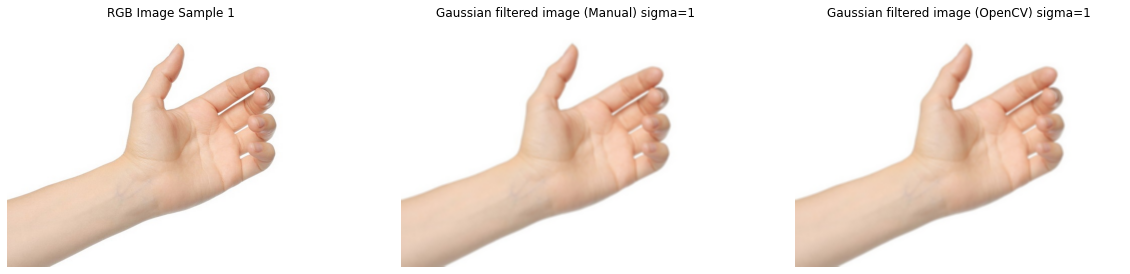

In [36]:
# implement Gaussian filter for image smoothing
def GaussianKernel(kernel_size=3, sigma=1):
  center=(int)(kernel_size/2)
  kernel=np.zeros((kernel_size,kernel_size))
  for i in range(kernel_size):
    for j in range(kernel_size):
      diff=np.sqrt((i-center)*2+(j-center)*2)
      kernel[i,j]=np.exp(-(diff*2)/(2*sigma*2))
  return kernel/np.sum(kernel)

# example of 5x5 Gaussian kernel with sigma=1
gauss_kernel_manual = GaussianKernel(5, 1)
print('Gaussian kernel manual: ', gauss_kernel_manual)

# filter the image using filter2D
gauss_filtered_img1 = cv2.filter2D(rgb_img1, -1,
gauss_kernel_manual)

# alternative Gaussian filter example using OpenCV library
gauss_filtered_img2 = cv2.GaussianBlur(rgb_img1, (5,5), 1)

# show images
ax1 = plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
plt.imshow(rgb_img1)
plt.title('RGB Image Sample 1')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(avg_filtered_img1)
plt.title('Gaussian filtered image (Manual) sigma=1')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(avg_filtered_img2)
plt.title('Gaussian filtered image (OpenCV) sigma=1')
plt.axis('off')

(-0.5, 649.5, 482.5, -0.5)

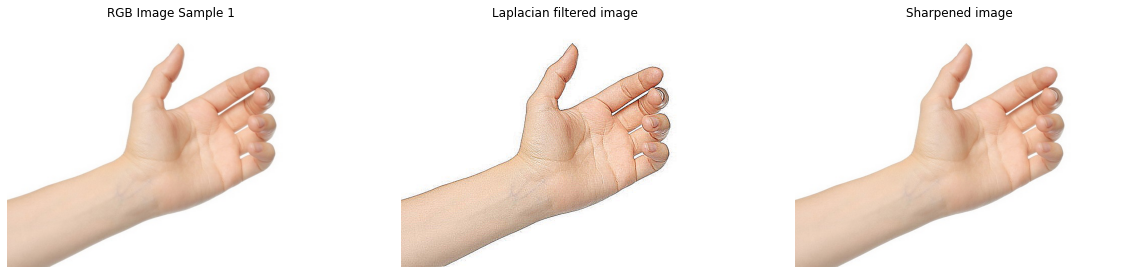

In [37]:
# implement laplacian filter for image sharpening
# example of 3x3 laplacian kernel
laplacian_kernel = np.array([[-1,-1,-1],
                            [-1, 9,-1],
                            [-1,-1,-1]])
# filter the image using filter2D, which has inputs: (image, bitdepth, kernel)
lap_filtered_img = cv2.filter2D(rgb_img1, -1, laplacian_kernel)

# or you can use Gaussian blurring to subtract the original image
gauss_filtered_img = cv2.GaussianBlur(rgb_img1, (3,3), 1)
sharpened_img = cv2.addWeighted(rgb_img1, 1.5, gauss_filtered_img, -0.5, 0)

# show images
ax1 = plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
plt.imshow(rgb_img1)
plt.title('RGB Image Sample 1')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(lap_filtered_img)
plt.title('Laplacian filtered image')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(sharpened_img)
plt.title('Sharpened image')
plt.axis('off')

Average kernel:  [[0.04 0.04 0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04 0.04 0.04]]


(-0.5, 649.5, 482.5, -0.5)

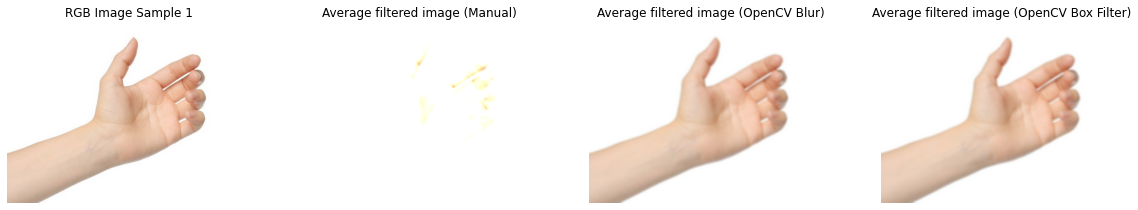

In [38]:
# implement average filter for image smoothing
# example 7x7 average kernel
avg_kernel = np.ones((7,7), np.float32)/25
print('Average kernel: ', avg_kernel)

# filter the image using filter2D
avg_filtered_img1 = cv2.filter2D(rgb_img1, -1, avg_kernel)

# alternative average filter example using OpenCV library
avg_filtered_img2 = cv2.blur(rgb_img1, (7,7))
avg_filtered_img3 = cv2.boxFilter(rgb_img1, -1, (7,7))

# show images
ax1 = plt.figure(figsize=(20,5))
plt.subplot(1,4,1)
plt.imshow(rgb_img1)
plt.title('RGB Image Sample 1')
plt.axis('off')

plt.subplot(1,4,2)
plt.imshow(avg_filtered_img1)
plt.title('Average filtered image (Manual)')
plt.axis('off')

plt.subplot(1,4,3)
plt.imshow(avg_filtered_img2)
plt.title('Average filtered image (OpenCV Blur)')
plt.axis('off')

plt.subplot(1,4,4)
plt.imshow(avg_filtered_img3)
plt.title('Average filtered image (OpenCV Box Filter)')
plt.axis('off')

Gaussian kernel manual:  [[nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan]]


<ipython-input-39-e60a962015ea>:7: RuntimeWarning: invalid value encountered in sqrt
  diff=np.sqrt((i-center)*2+(j-center)*2)


(-0.5, 649.5, 482.5, -0.5)

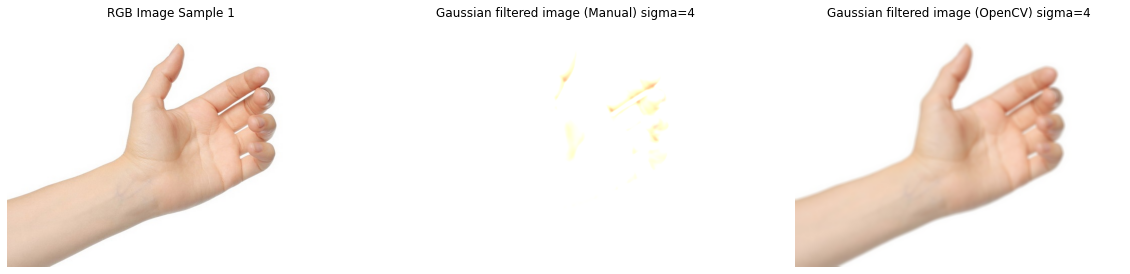

In [39]:
# implement Gaussian filter for image smoothing
def GaussianKernel(kernel_size=7, sigma=4):
    center=(int)(kernel_size/7)
    kernel=np.zeros((kernel_size,kernel_size))
    for i in range(kernel_size):
      for j in range(kernel_size):
          diff=np.sqrt((i-center)*2+(j-center)*2)
          kernel[i,j]=np.exp(-(diff*2)/(2*sigma*2))
    return kernel/np.sum(kernel)


gauss_kernel_manual = GaussianKernel(7, 4)
print('Gaussian kernel manual: ', gauss_kernel_manual)

# filter the image using filter2D
gauss_filtered_img1 = cv2.filter2D(rgb_img1, -1,
gauss_kernel_manual)

# alternative Gaussian filter example using OpenCV library
gauss_filtered_img2 = cv2.GaussianBlur(rgb_img1, (7,7), 4)

# show images
ax1 = plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
plt.imshow(rgb_img1)
plt.title('RGB Image Sample 1')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(avg_filtered_img1)
plt.title('Gaussian filtered image (Manual) sigma=4')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(avg_filtered_img2)
plt.title('Gaussian filtered image (OpenCV) sigma=4')
plt.axis('off')